In [1]:
import os 
import shutil
from os.path import join as path_join
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import datetime
matplotlib.use('Agg')
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Using TensorFlow backend.


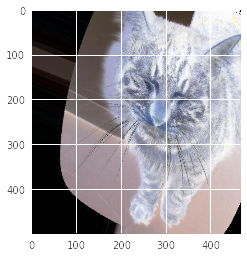

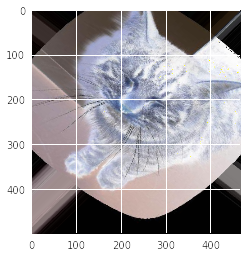

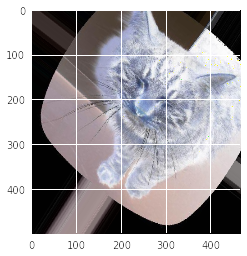

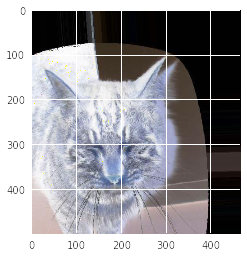

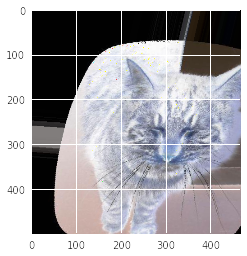

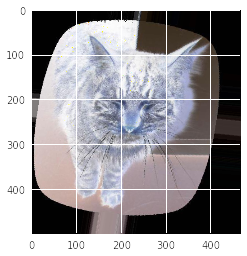

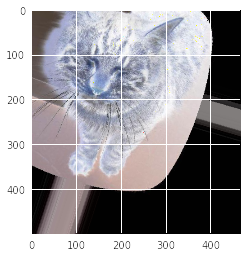

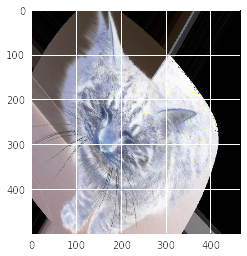

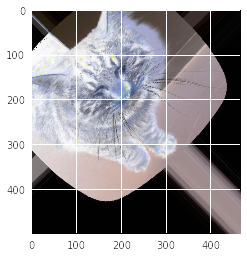

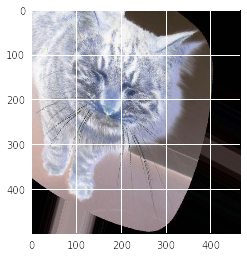

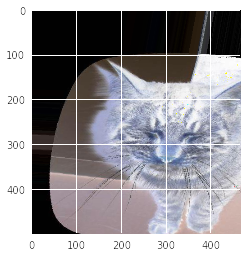

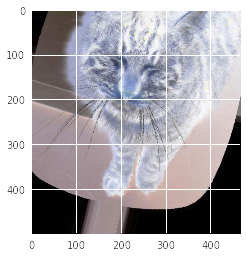

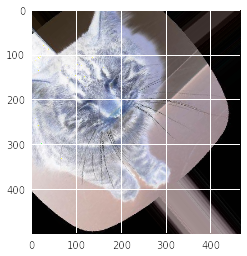

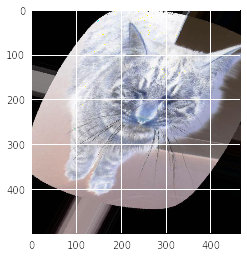

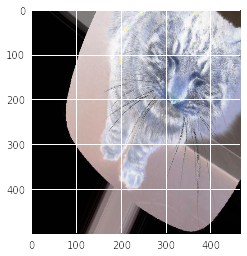

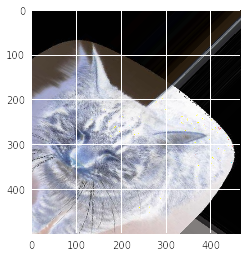

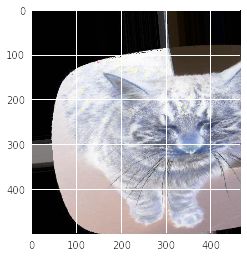

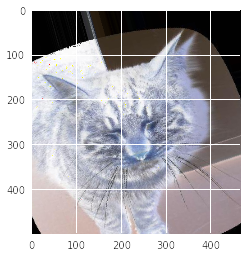

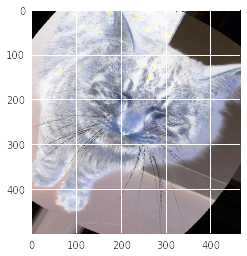

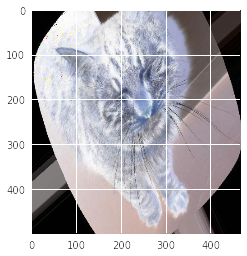

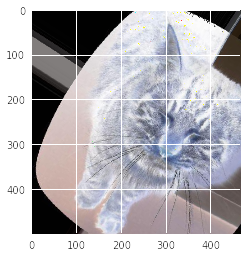

In [4]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('./data/train/cats/cat.11036.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1):
    fig = plt.figure()
    plt.imshow(batch[0])
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/valid'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [9]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 750 images belonging to 2 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 250 images belonging to 2 classes.


In [12]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('models/keras_blog.h5')

Epoch 1/50
125/125 [==============================] - 15s - loss: 0.6958 - acc: 0.5354 - val_loss: 0.6506 - val_acc: 0.6215
Epoch 2/50
125/125 [==============================] - 12s - loss: 0.6472 - acc: 0.6069 - val_loss: 0.5863 - val_acc: 0.7046
Epoch 3/50
125/125 [==============================] - 12s - loss: 0.6111 - acc: 0.6644 - val_loss: 0.6079 - val_acc: 0.7008
Epoch 4/50
125/125 [==============================] - 12s - loss: 0.5810 - acc: 0.6819 - val_loss: 0.5804 - val_acc: 0.7033
Epoch 5/50
125/125 [==============================] - 12s - loss: 0.5589 - acc: 0.7212 - val_loss: 0.5504 - val_acc: 0.6893
Epoch 6/50
125/125 [==============================] - 12s - loss: 0.5265 - acc: 0.7426 - val_loss: 0.5590 - val_acc: 0.6727
Epoch 7/50
125/125 [==============================] - 12s - loss: 0.4977 - acc: 0.7574 - val_loss: 0.6641 - val_acc: 0.7033
Epoch 8/50
125/125 [==============================] - 12s - loss: 0.4754 - acc: 0.7810 - val_loss: 0.5585 - val_acc: 0.7110
Epoch 9/

In [13]:
model.save_weights('models/keras_blog.h5')

In [14]:
import os

tests = os.listdir('./data/test')

In [20]:
res = {}

In [21]:
for fn in tests:
    img = load_img(os.path.join('./data/test', fn))
    img = img.resize((150,150))
    img = img_to_array(img)
    img = img.reshape((1,) + img.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    res[fn] = model.predict(img)

In [28]:
res = {key.split('.')[0]: value[0][0] for key, value in res.items()}

IndexError: invalid index to scalar variable.

1.0


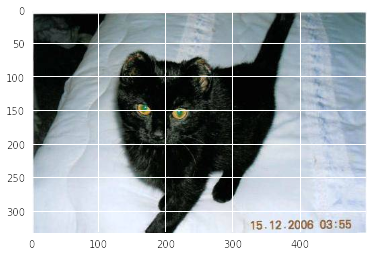

0.0


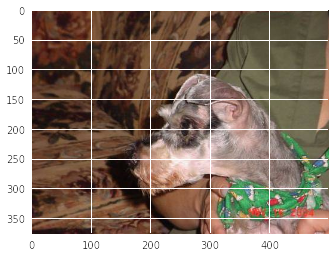

1.0


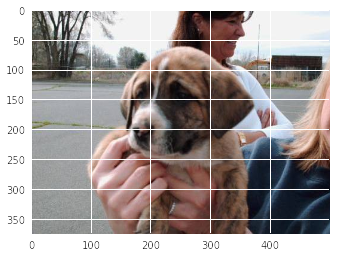

1.0


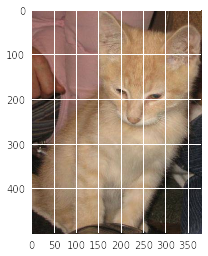

0.0


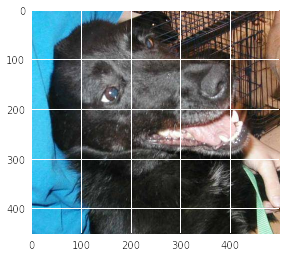

1.0


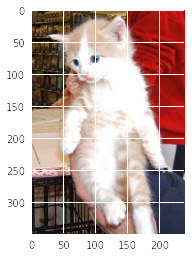

1.0


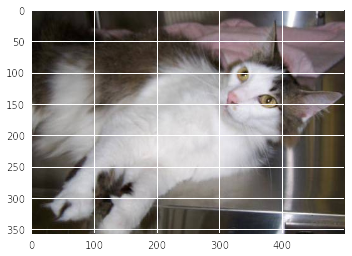

1.0


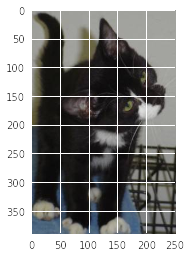

0.0


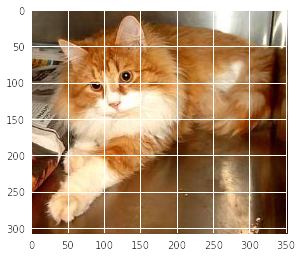

1.0


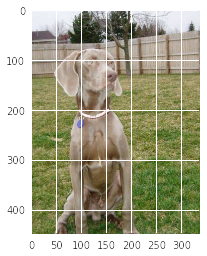

In [42]:
for key in list(res.keys())[10:20]:
    print(res[key])
    img = load_img(os.path.join('./data/test/', key+'.jpg'))
    plt.imshow(img)
    plt.show()

In [44]:
import pandas as pd

In [45]:
df = pd.DataFrame(res.items())

In [49]:
df.columns = ['id', 'label']

In [51]:
df.to_csv('output/keras_blog.cvs', index=False)